In [1]:
# Load my Packages
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
# Assign hidden API key
with open("api_stuff.txt", "r") as file:
    api_key = file.read()

In [46]:
# Tables that are ready
players_df = pd.read_csv('data/players.csv') # 393 players
ts_df = pd.read_csv('data/teams.csv') # 30 teams
stats = pd.read_csv('data/stats.csv')
final_df = pd.read_csv('data/final_table.csv')

In [28]:
# Extract Teams info from API
urlt = "https://api-nba-v1.p.rapidapi.com/teams"

headers = {
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
}

teams = requests.get(urlt, headers=headers)
t_df = pd.DataFrame(teams.json()['response'])

# Select only the ones in the nba Franchise
t_df = t_df[t_df['nbaFranchise'] == True]

#t_df.to_csv('teams.csv', index=False)
# We have 31 teams 


In [55]:
# Should we skip team 37 (#id 27)
# Get players info from API
urlp = "https://api-nba-v1.p.rapidapi.com/players"

# # # Create empty dataframe when initializing players_df tabble
# columns = ['id', 'firstname', 'lastname', 'birth_date', 'height_m', 'weight_kg']
# players_df = pd.DataFrame(columns=columns) 

# For each team get the players info (We have 31 teams, we will do 10 by 10)
for i in range(0,31): # Up to the index 31 (# Skip team 37 (#id 27))
	print('team', t_df.iloc[i]['id'])
	querystring = {"team": t_df.iloc[i]['id'], "season": "2023"}

	headers = {
		"X-RapidAPI-Key": api_key,
		"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
	}

	players = requests.get(urlp, headers=headers, params=querystring)

	p_df = pd.DataFrame(players.json()['response'])
	
	### Clean Players Data
	# Add Birth date column
	p_df['birth_date'] = p_df['birth'].apply(lambda x: pd.to_datetime(x['date']) if x['date'] else None)

	# Add height in meters column
	p_df['height_m'] = p_df['height'].apply(lambda x: float(x['meters']) if x['meters'] else None)

	# Add weight in kilograms column
	p_df['weight_kg'] = p_df['weight'].apply(lambda x: float(x['kilograms']) if x['kilograms'] else None)

	# Remove unnecessary columns
	p_df = p_df[['id', 'firstname', 'lastname', 'birth_date', 'height_m', 'weight_kg']]

	# Remove players with NAs
	p_df = p_df.dropna()

	# Create Age column
	p_df['age'] = (datetime.now() - p_df['birth_date']).astype('<m8[Y]').astype(int)

	# add each player info season and team to my players df
	players_df = pd.concat([players_df, p_df], ignore_index=True)

# Order by Player ID
players_df = players_df.sort_values('id')

# Write into a csv File
# players_df.to_csv('players.csv', index=False) 
# # We have 393 players


team 24
team 25
team 26
team 27
team 28
team 29
team 30
team 31


In [140]:
# Get Player stats per game info from API
urlps = "https://api-nba-v1.p.rapidapi.com/players/statistics"
ps = pd.DataFrame()
for i in range(135,145): # I have 393 players (do 10 by 10)
	querystring = {"id":players_df.iloc[i]['id'],"season":"2023"}

	headers = {
		"X-RapidAPI-Key": api_key,
		"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
	}

	player_ps = requests.get(urlps, headers=headers, params=querystring)
	ps = pd.concat([ps, pd.DataFrame(player_ps.json()['response'])], ignore_index=True)


IndexError: single positional indexer is out-of-bounds

In [141]:
ps

,player,team,game,points,pos,min,fgm,fga,fgp,ftm,...,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus,comment
0,"{'id': 2855, 'firstname': 'Cam', 'lastname': '...","{'id': 4, 'name': 'Brooklyn Nets', 'nickname':...",{'id': 12488},26,SG,22,9,14,64.3,4,...,0,2,2,2,2,0,1,0,-1,None
1,"{'id': 2855, 'firstname': 'Cam', 'lastname': '...","{'id': 4, 'name': 'Brooklyn Nets', 'nickname':...",{'id': 12504},7,SG,20,2,9,22.2,2,...,2,1,3,2,0,0,1,0,0,None
2,"{'id': 2855, 'firstname': 'Cam', 'lastname': '...","{'id': 4, 'name': 'Brooklyn Nets', 'nickname':...",{'id': 12531},14,SG,27,3,14,21.4,7,...,0,0,0,1,0,0,2,0,+1,None
3,"{'id': 2855, 'firstname': 'Cam', 'lastname': '...","{'id': 4, 'name': 'Brooklyn Nets', 'nickname':...",{'id': 12521},18,SG,23,6,14,42.9,3,...,1,3,4,2,3,1,3,0,-13,None
4,"{'id': 2855, 'firstname': 'Cam', 'lastname': '...","{'id': 4, 'name': 'Brooklyn Nets', 'nickname':...",{'id': 12555},36,SG,25,13,21,61.9,8,...,0,3,3,2,0,1,1,0,+5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,"{'id': 3091, 'firstname': 'Braxton', 'lastname...","{'id': 9, 'name': 'Denver Nuggets', 'nickname'...",{'id': 12811},1,F,3,0,0,0,1,...,0,1,1,1,1,0,0,0,-9,None
83,"{'id': 3396, 'firstname': 'Xavier', 'lastname'...","{'id': 16, 'name': 'LA Clippers', 'nickname': ...",{'id': 12485},9,PG,23,4,11,36.4,0,...,1,2,3,4,1,0,1,1,-4,None
84,"{'id': 3396, 'firstname': 'Xavier', 'lastname'...","{'id': 16, 'name': 'LA Clippers', 'nickname': ...",{'id': 12495},9,PG,19,4,10,40.0,0,...,1,3,4,3,2,0,3,1,-12,None
85,"{'id': 3396, 'firstname': 'Xavier', 'lastname'...","{'id': 16, 'name': 'LA Clippers', 'nickname': ...",{'id': 12530},12,PG,14,5,9,55.6,0,...,2,0,2,3,0,1,1,0,-1,None


In [142]:
# Clean stats table

# Add player id
ps['id'] = ps['player'].apply(lambda x: x['id'] if x['id'] else None)

# Add player name
ps['name'] = ps['player'].apply(lambda x: x['firstname'] + " "  + x['lastname'])

# Add team code
ps['team'] = ps['team'].apply(lambda x: x['code'] if x['code'] else None)

# Edit plusMinus to be a number
ps['plusMinus'] = ps['plusMinus'].apply(lambda x: int(x[1:]) * -1 if x and x[0] == '-' else int(x) if x != '' else None)

# Edit min to be a number
ps['min'] = ps['min'].apply(lambda x: int(x) if str(x).isnumeric() else None)

# Make them numeric otherwise null for percentage columns
ps['fgp'] = pd.to_numeric(ps['fgp'], errors='coerce')
ps['ftp'] = pd.to_numeric(ps['ftp'], errors='coerce')
ps['tpp'] = pd.to_numeric(ps['tpp'], errors='coerce')

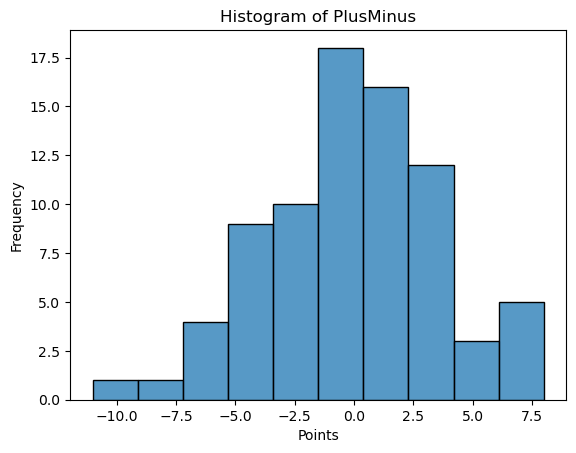

In [150]:
# PlusMinus Histogram

# Heigth Histogram
sns.histplot(stats['plusMinus'])

# Optional: Customize plot labels and title
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Histogram of PlusMinus')

# Show the plot
plt.show()

In [143]:
# Group by player
ps = ps.groupby('id').agg({
    'name': 'first',
    'team': 'first',
    'pos': 'first',
    'game': 'count',
    'points': 'mean',
    'min' : 'mean', 
    'fgm' : 'mean', 
    'fga': 'mean', 
    'fgp': 'mean',
    'ftm' : 'mean', 
    'fta': 'mean', 
    'ftp': 'mean', 
    'tpm': 'mean', 
    'tpa': 'mean', 
    'tpp': 'mean', 
    'offReb': 'mean', 
    'defReb': 'mean', 
    'totReb': 'mean',
    'assists': 'mean', 
    'pFouls': 'mean', 
    'steals': 'mean', 
    'turnovers': 'mean', 
    'blocks': 'mean',
    'plusMinus': 'mean'
}).reset_index().round()

# Make all numeric variables integers
ps.iloc[:, 4:] = ps.iloc[:, 4:].astype(int)

# Add performance column
ps['performnce'] = pd.cut(ps['plusMinus'], bins=[-float('inf'), -3, 3, float('inf')], labels=['low', 'average', 'high'])

# Turn percentages to decimals
ps['fgp'] = ps['fgp'] / 100
ps['ftp'] = ps['ftp'] / 100
ps['tpp'] = ps['tpp'] / 100

# Start over
# stats = pd.DataFrame()

# Add to our existing table
stats = pd.concat([stats, ps], ignore_index=True)

/var/folders/3g/j5vh3c7n53sb924vl6sb5jbc0000gn/T/ipykernel_23204/636947880.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ps.iloc[:, 4:] = ps.iloc[:, 4:].astype(int)


In [7]:
# Create a t score formula 
def get_t(x, column):
    t = (x - column.mean()) / column.std()
    return t


In [131]:
# Create function to get greatest strength for a given player (row)
def get_b_strength(player):
    skills = ['fgp', 'ftp', 'tpp', 'totReb', 'assists', 'steals']
    max = -3
    m_skill = "None"
    for i in skills:
        t_score = get_t(player[i], stats[i])
        if t_score > max:
            max = t_score
            m_skill = i
    if max <= 0:
        if player['blocks'] == 1:
            m_skill == 'blocks'
    return m_skill
    

In [132]:
# Create function to get worst weekednes for a given player (row)
def get_b_weakedness(player):
    w = ['turnovers', 'pFouls']
    max = -3
    m_skill = "None"
    for i in w:
        t_score = get_t(player[i], stats[i])
        if t_score > max:
            max= t_score
            m_skill = i
    if max <= 0:
        min = 3
        skills = ['fgp', 'ftp', 'tpp', 'totReb', 'assists', 'steals']
        for i in skills:
            t_score = get_t(player[i], stats[i])
            if t_score < min:
                min = t_score
                m_skill = i
        if min >= 0:
            if player['blocks'] != 1:
                m_skill == 'blocks'
    return m_skill

In [144]:
# Create b_strength column
stats['b_strength'] = [get_b_strength(stats.iloc[i]) for i in range(len(stats))]

In [145]:
# Create b_weakedness column
stats['b_weakedness'] = [get_b_weakedness(stats.iloc[i]) for i in range(len(stats))]

In [146]:
# Write the table in a CSV file
stats.to_csv('stats.csv', index=False)

In [147]:
# Add my players info with their stats
final_df = pd.merge(stats, players_df[['id', 'height_m', 'weight_kg', 'age']])


In [148]:
# Write final csv file
final_df.to_csv('final_table.csv', index=False)

In [149]:
len(final_df)

79

**EDA Exploratory Data Analsysis**

_Question to Answer_

I started:
- Distribution of each number type (Understand data and start asking questions)
- Collinearity between skills (Heat map) - Do I have renundancy in my stats?
- Relationship between Height and Weight (Do we need both, or does one pretty much tells the other one) - I say yes

Height Questions

- Distribution of Height per position (Does height influence which position you will have?) I say yes
- Distribution of Height per strength (Does strength influence which position you will have?) I say yes
- Distribution of Height per Weakness (Does weakness influence which position you will have?) I say no
- Distribution of Height per Perfomance (Does height determine your perfomance?) I say no
- Relationship between Height and plusMinus (Does height determine your perfomance?) I say no
- Relationship between Height and Blocks (Does height influence your blocks ability?) I say yes
- Relationship between Height and Points (Do you score more points if you are taller?)
- Relationship between skills and Height (Linear Regression)
- Which range of Weight should you have if you have a given height

Position Question
- Count for Positions
- Ceratins positions score more?
- Relationship between position and strength (Based on your position, which is your most likely strength)
- Relationship between position and weakness (Based on your position, which is your most likely strength)
- Relationship between position and skills (Based on your position, which is your top 3 skills you should focus on)
- Relationship between position and Performance (Does position determines your perfomance?)
- Relationship between position and plusMinus (Does position determines your perfomance?)
- Relationship between mins and position (How much time will I play for a given position)

Final Question
- Based on Heigth and desired position, what skills should I have to be high performing player?

In [ ]:
# Realized there are a tone of questions I can asnwer, but I'll focus on those topics

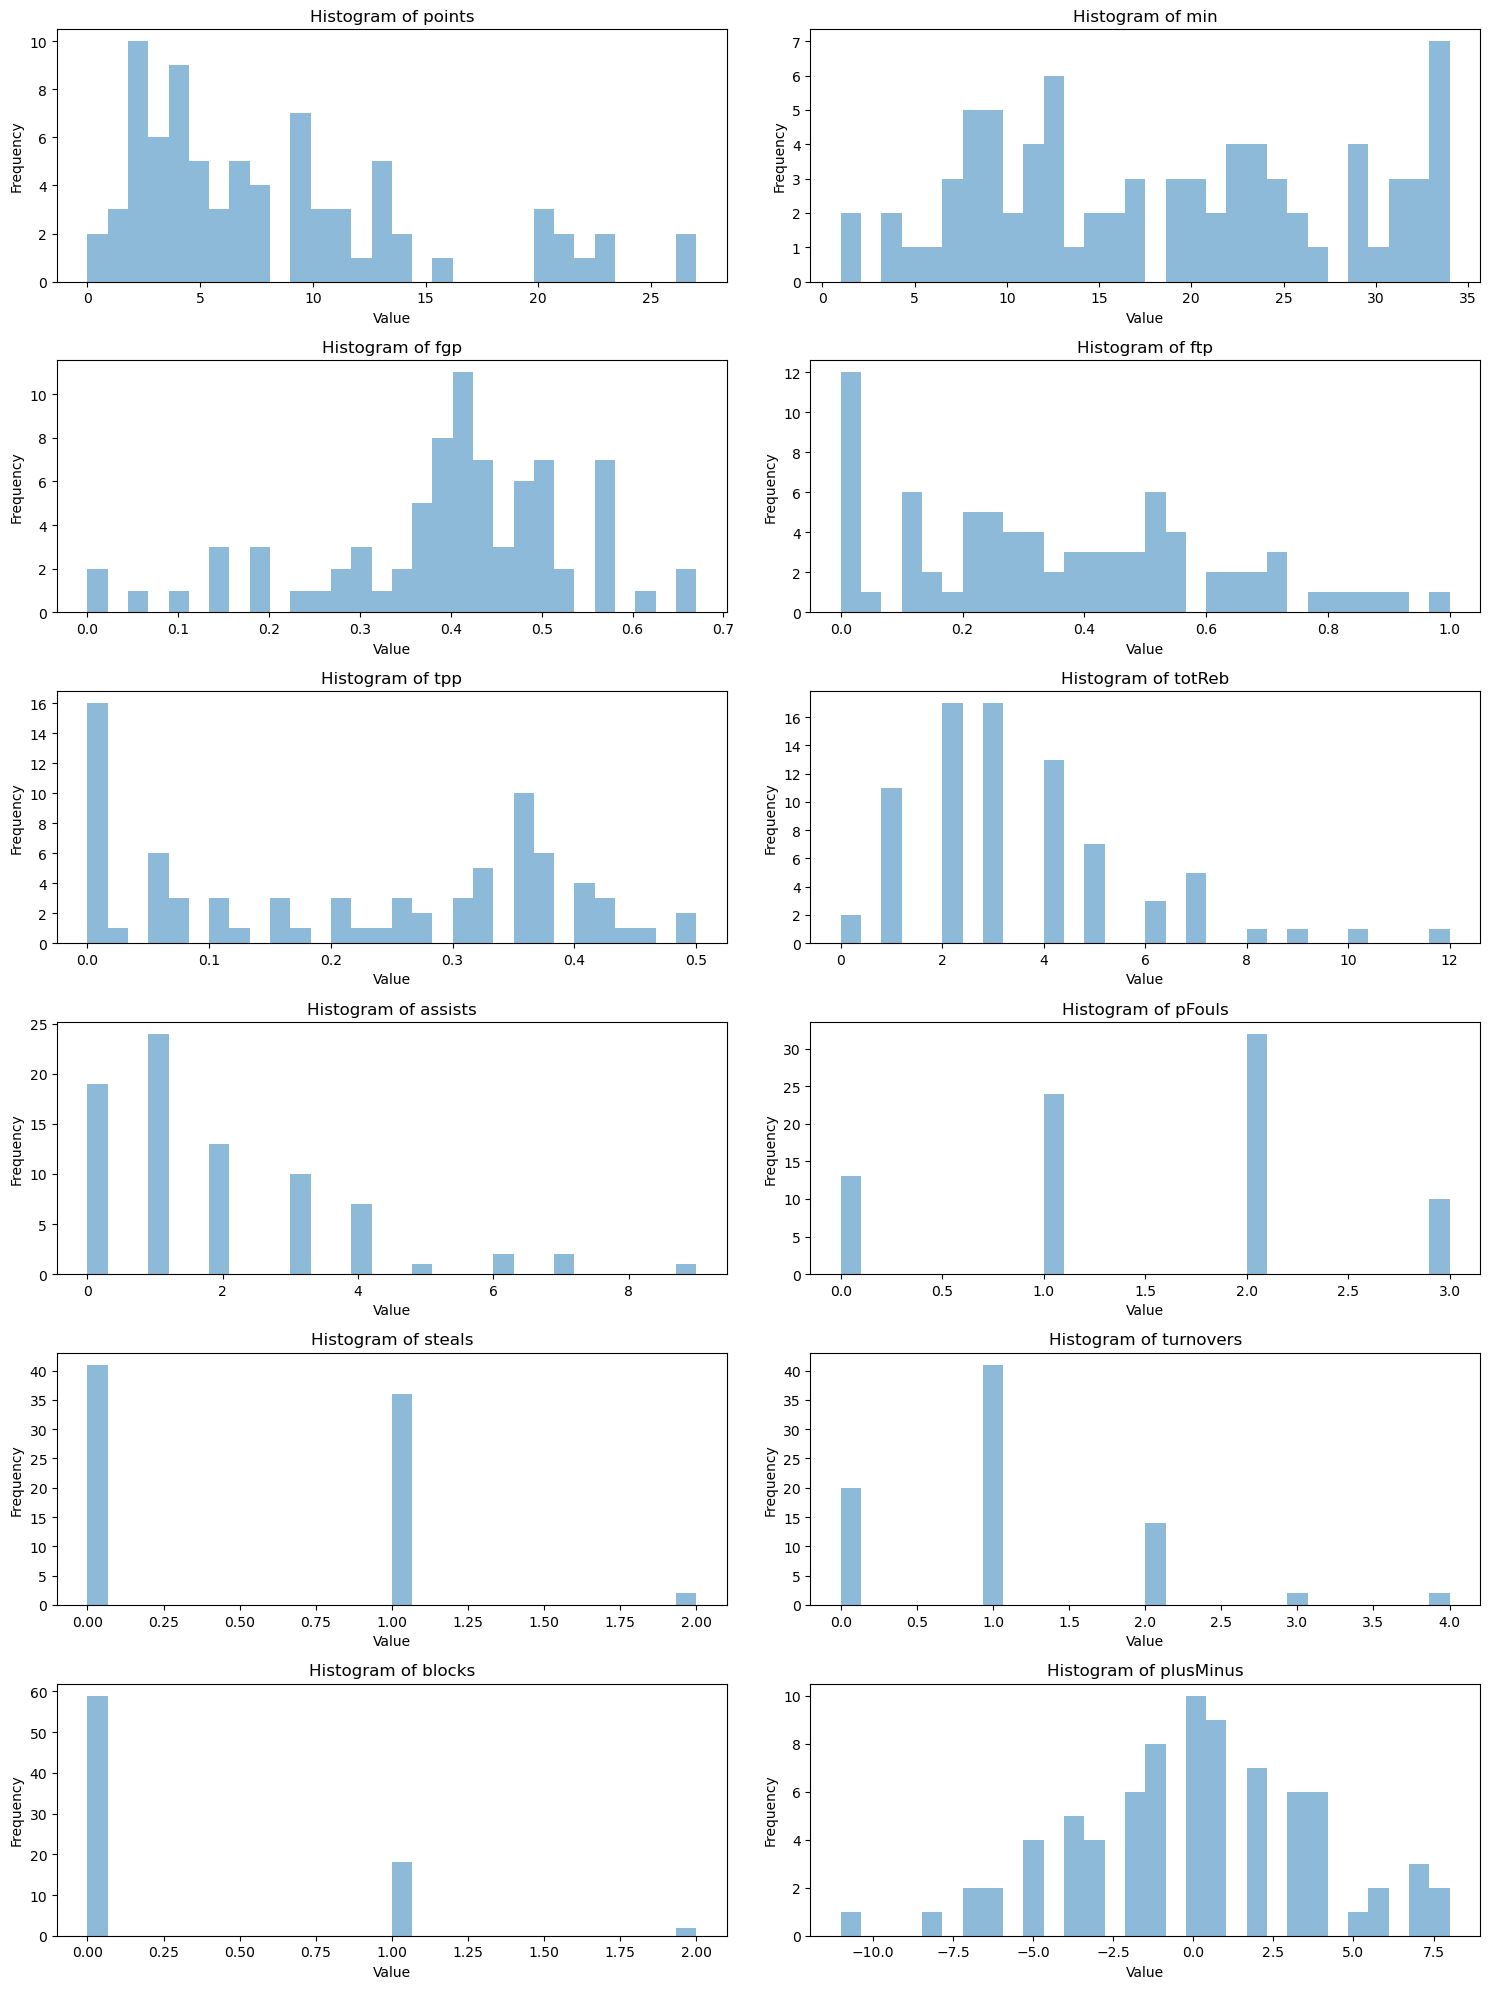

In [151]:
# Distribution of each Skill

selected_columns = ['points', 'min','fgp','ftp', 'tpp', 'totReb', 'assists', 'pFouls', 'steals',
       'turnovers', 'blocks', 'plusMinus']

# Creating subplots
fig, axes = plt.subplots(nrows=len(selected_columns)//2, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Plotting histograms for each selected column in separate subplots
for col, ax in zip(selected_columns, axes.flatten()):
    ax.hist(stats[col], bins=30, alpha=0.5)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

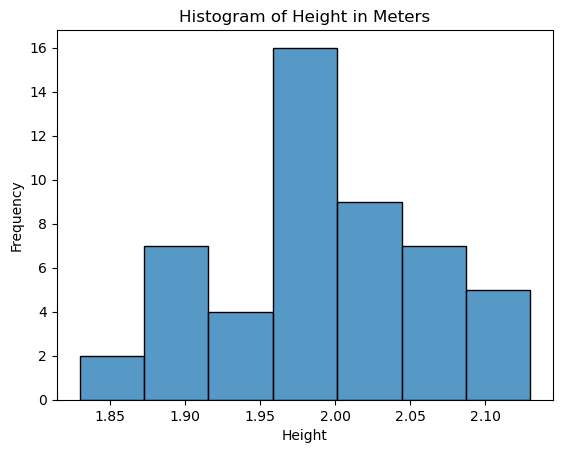

1.83

In [79]:
# Heigth Distribution
sns.histplot(final_df['height_m'])

# Optional: Customize plot labels and title
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Height in Meters')

# Show the plot
plt.show()

In [82]:
print(f"Min Height: {final_df['height_m'].min()}")

Min Height: 1.83


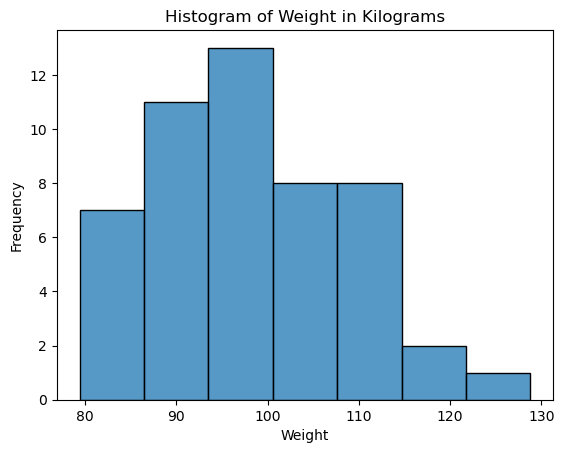

In [83]:
# Weight Histogram

# Heigth Histogram
sns.histplot(final_df['weight_kg'])

# Optional: Customize plot labels and title
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Weight in Kilograms')

# Show the plot
plt.show()

In [85]:
print(f"Min Weight: {final_df['weight_kg'].min()}")

Min Weight: 79.4


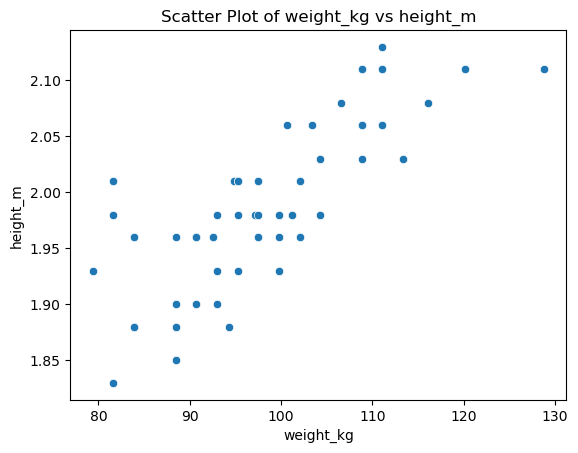

In [88]:
col1 = 'weight_kg'
col2 = 'height_m'

# Create a scatter plot
sns.scatterplot(x=col1, y=col2, data=final_df)

# Add labels and title
plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot of Weight vs Height')

# Show the plot
plt.show()


In [ ]:
# It looks like There is a linear relatioship between weight and Height. I could just use one of them

/var/folders/3g/j5vh3c7n53sb924vl6sb5jbc0000gn/T/ipykernel_23204/3314702815.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()


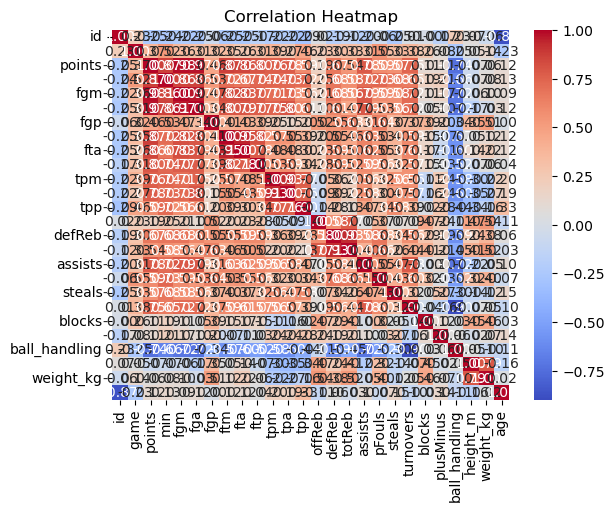

In [114]:
# Collinearity between variables

# Replace it with your actual data
correlation_matrix = final_df.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
# Age boxplot
sns.histplot(x=players_df['age'], color='skyblue')

# Optional: Customize plot labels and title
plt.xlabel('Age')
plt.title('Age Distribution')

# Show the plot
plt.show()

In [ ]:
# Is there a big difference (Is my app a good idea. )
# See if there are other questions I could consider answering.